# Grammatical and semantic gender directions in plain language word2vec

<span style="color:red">**Use Google Ngram Viewer to view the proportion of female- and male-related words in a general context**</span>: In fact, since we do not have access to the original corpus on which the plain language embeddings were trained, this could be a way to circumvent this issue.

This notebook explores the grammatical and semantic gender direction detection in word2vec models (Skip-Gram and CBOW) trained on plain language. 

The pre-trained word2vec models used are from [J.-P. Fauconnier](https://fauconnier.github.io/). The **frWaC** corpus is used: a 1.6 billion word corpus constructed from the Web limiting the crawl to the .fr domain and using medium-frequency words from the Le Monde Diplomatique corpus and basic French vocabulary lists as seeds.

In [1]:
# loading libraries 
import matplotlib.pyplot as plt
import numpy as np
import copy
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

# import sklearn modules
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

# increase plots resolution 
plt.rcParams['figure.dpi'] = 130
plt.rcParams['savefig.dpi'] = 130

# import internal libraries 
import os 
os.chdir("../lib/")
from utils import *
os.chdir("../notebooks/")

In [2]:
# loading the word2vec models
cbow_200 = KeyedVectors.load_word2vec_format("../../new_pretrained_word2vec/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin", binary=True, unicode_errors="ignore")
sg_200 = KeyedVectors.load_word2vec_format("../../new_pretrained_word2vec/frWac_non_lem_no_postag_no_phrase_200_skip_cut100.bin", binary=True, unicode_errors="ignore")
sg_500 = KeyedVectors.load_word2vec_format("../../new_pretrained_word2vec/frWac_non_lem_no_postag_no_phrase_500_skip_cut100.bin", binary=True, unicode_errors="ignore")


print(f"dim. of the embeddings :", cbow_200.vector_size, sg_200.vector_size, sg_500.vector_size)

dim. of the embeddings : 200 200 500


*Since there was no cbow with 500 dimension, we load the one with 1000 and resize the emebddings*

### Identifying the semantic gender direction

In [5]:
# gender-definition word pairs
female_def_words = "soeur mère fille femme cousine tante madame".split()
male_def_words = "frère père garçon homme cousin oncle monsieur".split()

# female and male embeddings
female_cbow_200, male_cbow_200 = cbow_200[female_def_words], cbow_200[male_def_words]
female_sg_200, male_sg_200 = sg_200[female_def_words], sg_200[male_def_words]
female_sg_500, male_sg_500 = sg_500[female_def_words], sg_500[male_def_words]

# semantic gender direction using PCA
comp_cbow_200, sing_val_cbow_200 = semantic_dirct_PCA(cbow_200, female_def_words, male_def_words, get_sing_values=True)
comp_sg_200, sing_val_sg_200 = semantic_dirct_PCA(cbow_200, female_def_words, male_def_words, get_sing_values=True)
comp_sg_500, sing_val_sg_500 = semantic_dirct_PCA(cbow_200, female_def_words, male_def_words, get_sing_values=True)


In [7]:
comp_cbow_200.shape

(7, 200)

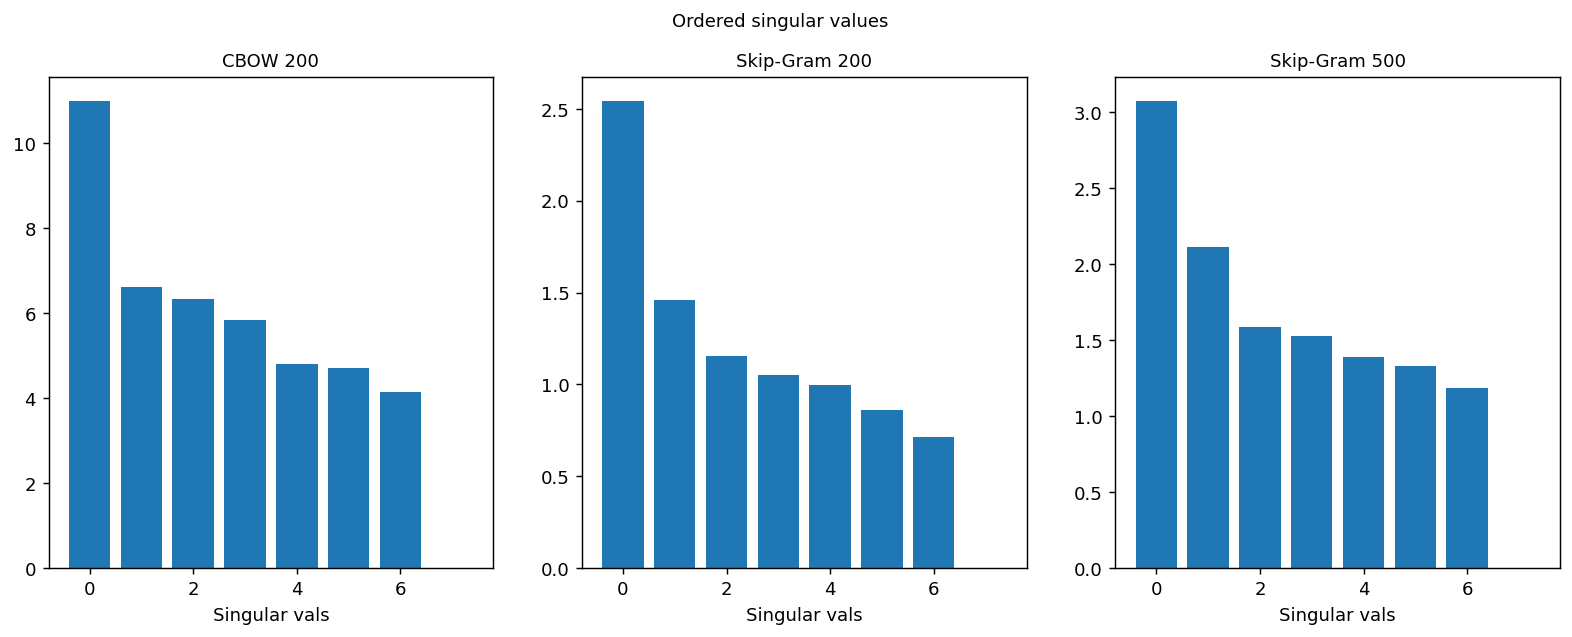

In [ ]:
# plot the gender-space singular values of each word2vec model
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
font_size=10

axes[0].bar(x=np.arange(len(sing_val_cbow_200)), height=sing_val_cbow_200)
axes[1].bar(x=np.arange(len(sing_val_sg_200)), height=sing_val_sg_200)
axes[2].bar(x=np.arange(len(sing_val_sg_500)), height=sing_val_sg_500)

# axis labeling
#axes[0].set_ylabel("", fontsize=font_size)
axes[0].set_xlabel("Singular vals", fontsize=font_size)
axes[1].set_xlabel("Singular vals", fontsize=font_size)
axes[2].set_xlabel("Singular vals", fontsize=font_size)

# set plot titles
axes[0].set_title("CBOW 200", fontsize=font_size)
axes[1].set_title("Skip-Gram 200", fontsize=font_size)
axes[2].set_title("Skip-Gram 500", fontsize=font_size)
plt.suptitle('Ordered singular values',fontsize=font_size)

plt.show()

**Comment:**

Appearently, there is one particular direction that exhibits th emaximum change in terms of semantic gender. 

**Projection of the 1st principal component**

ValueError: shapes (7,500) and (200,1) not aligned: 500 (dim 1) != 200 (dim 0)

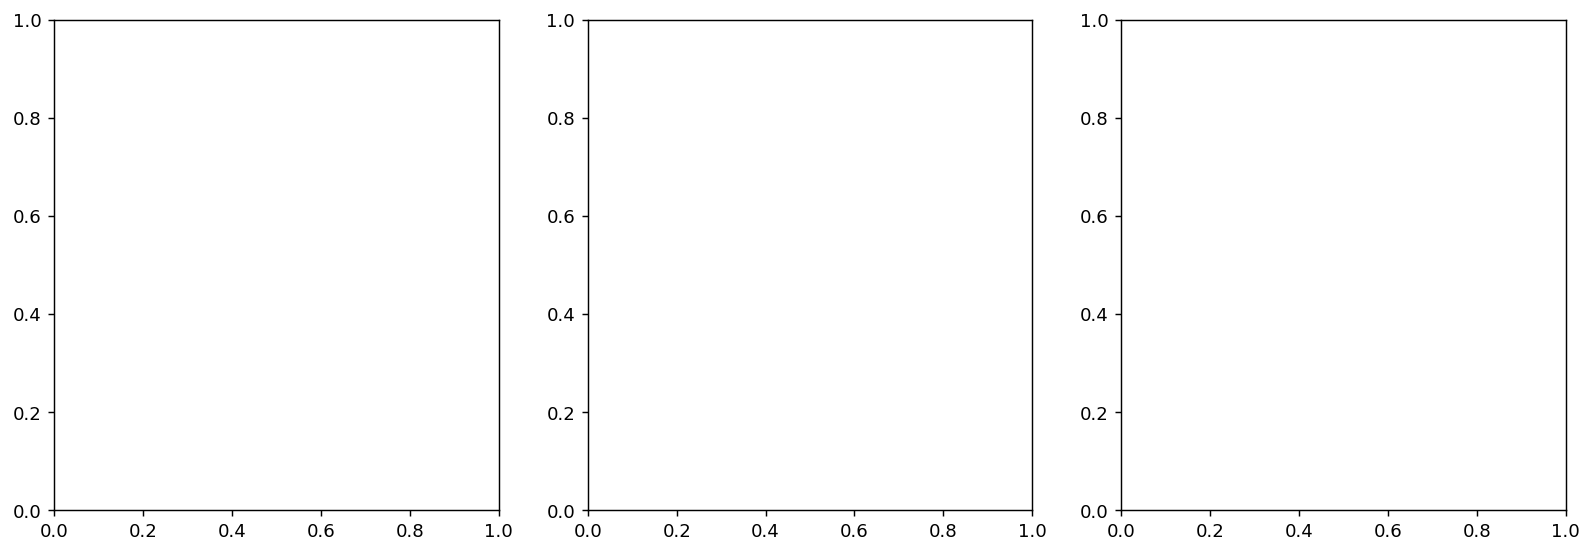

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
font_size=10

# projection onto the gender space (1st principal component)
female_proj_cbow_200, male_proj_cbow_200 = proj_onto_space(female_cbow_200, comp_cbow_200[0]), proj_onto_space(male_cbow_200, comp_cbow_200[0])
female_proj_sg_200, male_proj_sg_200 = proj_onto_space(female_sg_200, comp_sg_200[0]), proj_onto_space(male_sg_200, comp_sg_200[0])
female_proj_sg_500, male_proj_sg_500 = proj_onto_space(female_sg_500, comp_sg_500[0]), proj_onto_space(male_sg_500, comp_sg_500[0])

# plot projections 
scatter_align_words(female_proj_cbow_200.reshape(-1), male_proj_cbow_200.reshape(-1), female_def_words, male_def_words, ax=axes[0])
scatter_align_words(female_proj_sg_200.reshape(-1), male_proj_sg_200.reshape(-1),female_def_words, male_def_words, ax=axes[1])
scatter_align_words(female_proj_sg_500.reshape(-1), male_proj_sg_500.reshape(-1),female_def_words, male_def_words, ax=axes[2])

# labeling plots and axes
#axes[0, 0].set_ylabel("Leg. XIV", fontsize=font_size)
#axes[1, 0].set_ylabel("Leg. XV", fontsize=font_size)

axes[0].set_title("CBOW 200", fontsize=font_size)
axes[1].set_title("Skip-Gram 200", fontsize=font_size)
axes[2].set_title("Skip-Gram 500", fontsize=font_size)
axes[0].set_xlabel(r"Semantic gender: female   $\rightarrow$   male", fontsize=10)
axes[1].set_xlabel(r"Semantic gender: female   $\rightarrow$   male", fontsize=10)
axes[2].set_xlabel(r"Semantic gender: female   $\rightarrow$   male", fontsize=10)

plt.show()

### Identifying the grammatical gender direction

Before performing any bias measurements, we should first disentangle the grammatical gender direction.
For this, we use the iterative method proposed by [Sabbaghi et al.](https://arxiv.org/pdf/2206.01691.pdf). It consists of iteratively extracting the grammatical gender direction from the new word embedding (from which the grammatical component is removed) until we reach an classification accuracy $^{\star}$ of $\approx 50\%$. The iteratively extracted grammatical gender directions are saved to be used later in removing the grammatical gender component from word embeddings. 

$^{\star}$ The classification task consist of using LDA to distinguish between grammatically feminine and grammatically masculine words.

*Loading lists of grammatical gender words*

In [50]:
# load grammatical gender word lists
with open("../data/grammatical_masculine.txt", "r") as output:
    masc_gram = output.read()
    output.close()

with open("../data/grammatical_feminine.txt", "r") as output:
    fem_gram = output.read()
    output.close()

fem_gram = fem_gram.split('\n')
masc_gram = masc_gram.split('\n')

# final lists of words that appear in the vocab of all models
final_gram_fem, final_gram_masc = [], []
for word in fem_gram:
    if word in cbow_200.index_to_key and word in sg_200.index_to_key and word in sg_500.index_to_key:
        final_gram_fem.append(word)

for word in masc_gram:
    if word in cbow_200.index_to_key and word in sg_200.index_to_key and word in sg_500.index_to_key:
        final_gram_masc.append(word)

print(len(final_gram_fem), len(final_gram_masc))

1104 1330


In [51]:
# keep the same size for both lists
n_words = min(len(final_gram_fem), len(final_gram_masc))
final_gram_fem, final_gram_masc = final_gram_fem[:n_words], final_gram_masc[:n_words]
print(len(final_gram_fem), len(final_gram_masc))

1104 1104


`gram_dirct` function from `lib/utils.py` returns the iterative grammatical gender directions as well as the classification test scores that reflect how much more grammatical signals are still hidden in the word embeddings. 

The retrieved grammatical gender directions will later be used to disentangle the grammatical signals from embeddings. 

In [52]:
# grammatical gender directions
test_scores_cbow_200, gram_drcts_cbow_200 = gram_dirct(cbow_200, final_gram_fem, final_gram_masc)
test_scores_sg_200, gram_drcts_sg_200 = gram_dirct(sg_200, final_gram_fem, final_gram_masc)
test_scores_sg_500, gram_drcts_sg_500 = gram_dirct(sg_500, final_gram_fem, final_gram_masc)

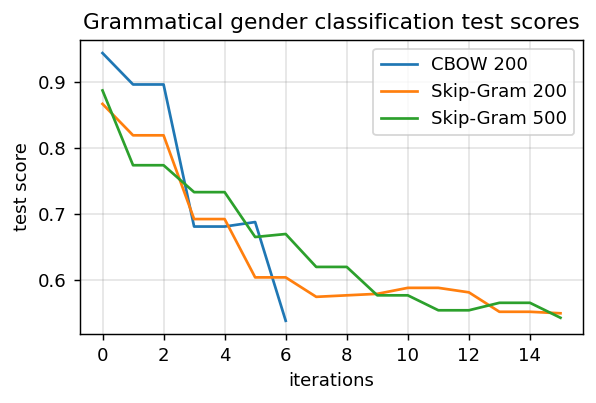

In [53]:
# plot of the test scores 
plt.figure(figsize=(5,3))
plt.plot(test_scores_cbow_200, label='CBOW 200')
plt.plot(test_scores_sg_200, label='Skip-Gram 200')
plt.plot(test_scores_sg_500, label='Skip-Gram 500')
plt.title("Grammatical gender classification test scores")
plt.xlabel("iterations")
plt.ylabel("test score")
plt.grid(color='gray', linestyle='-', linewidth=.2)
plt.legend()
plt.show()

**Comparison of the grammatical disentanglement after 1 iterations VS many iterations**

In [54]:
n_words = 10

# one disentanglement iteration
disen_1_fem_cbow_200, disen_1_masc_cbow_200 = disentangle_gram_dirct(cbow_200, final_gram_fem[:n_words], gram_drcts_cbow_200[0:1]), disentangle_gram_dirct(cbow_200, final_gram_masc[:n_words], gram_drcts_cbow_200[0:1])
disen_1_fem_sg_200, disen_1_masc_sg_200 = disentangle_gram_dirct(sg_200, final_gram_fem[:n_words], gram_drcts_sg_200[0:1]), disentangle_gram_dirct(sg_200, final_gram_masc[:n_words], gram_drcts_sg_200[0:1])
disen_1_fem_sg_500, disen_1_masc_sg_500 = disentangle_gram_dirct(sg_500, final_gram_fem[:n_words], gram_drcts_sg_500[0:1]), disentangle_gram_dirct(sg_500, final_gram_masc[:n_words], gram_drcts_sg_500[0:1])

proj_1_fem_cbow_200, proj_1_masc_cbow_200 = proj_onto_space(disen_1_fem_cbow_200, gram_drcts_cbow_200[1]), proj_onto_space(disen_1_masc_cbow_200, gram_drcts_cbow_200[1])
proj_1_fem_sg_200, proj_1_masc_sg_200 = proj_onto_space(disen_1_fem_sg_200, gram_drcts_sg_200[1]), proj_onto_space(disen_1_masc_sg_200, gram_drcts_sg_200[1])
proj_1_fem_sg_500, proj_1_masc_sg_500 = proj_onto_space(disen_1_fem_sg_500, gram_drcts_sg_500[1]), proj_onto_space(disen_1_masc_sg_500, gram_drcts_sg_500[1])

# full disentanglement iteration
disen_full_fem_cbow_200, disen_full_masc_cbow_200 = disentangle_gram_dirct(cbow_200, final_gram_fem[:n_words], gram_drcts_cbow_200[:-1]), disentangle_gram_dirct(cbow_200, final_gram_masc[:n_words], gram_drcts_cbow_200[:-1])
disen_full_fem_sg_200, disen_full_masc_sg_200 = disentangle_gram_dirct(sg_200, final_gram_fem[:n_words], gram_drcts_sg_200[:-1]), disentangle_gram_dirct(sg_200, final_gram_masc[:n_words], gram_drcts_sg_200[:-1])
disen_full_fem_sg_500, disen_full_masc_sg_500 = disentangle_gram_dirct(sg_500, final_gram_fem[:n_words], gram_drcts_sg_500[:-1]), disentangle_gram_dirct(sg_500, final_gram_masc[:n_words], gram_drcts_sg_500[:-1])

proj_full_fem_cbow_200, proj_full_masc_cbow_200 = proj_onto_space(disen_full_fem_cbow_200, gram_drcts_cbow_200[-1]), proj_onto_space(disen_full_masc_cbow_200, gram_drcts_cbow_200[-1])
proj_full_fem_sg_200, proj_full_masc_sg_200 = proj_onto_space(disen_full_fem_sg_200, gram_drcts_sg_200[-1]), proj_onto_space(disen_full_masc_sg_200, gram_drcts_sg_200[-1])
proj_full_fem_sg_500, proj_full_masc_sg_500 = proj_onto_space(disen_full_fem_sg_500, gram_drcts_sg_500[-1]), proj_onto_space(disen_full_masc_sg_500, gram_drcts_sg_500[-1])

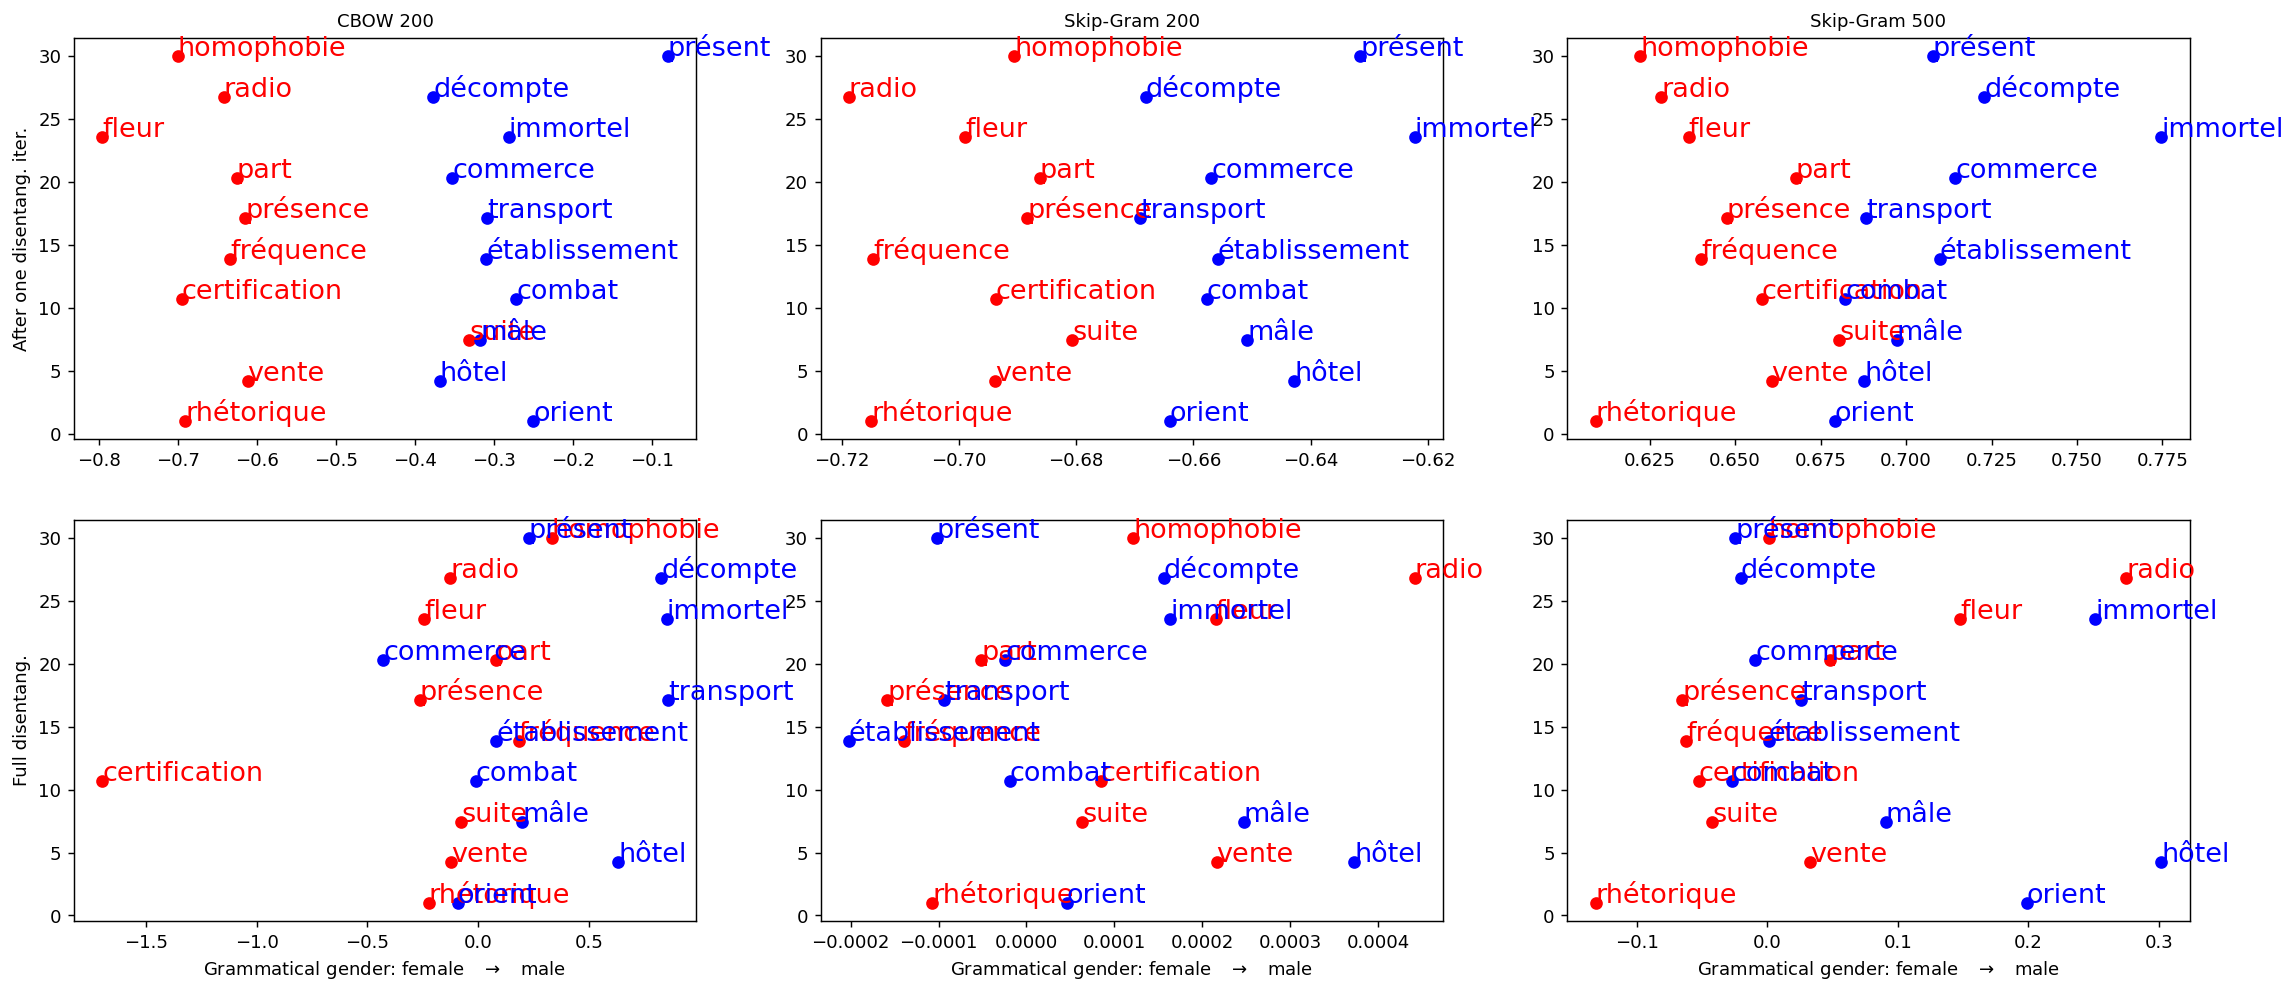

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(21, 9))
font_size=10

#gram_list_test = list(zip(gram_list_fem, gram_list_masc))

# plot projection 
scatter_align_words(proj_1_fem_cbow_200.reshape(-1), proj_1_masc_cbow_200.reshape(-1), final_gram_fem[:n_words], final_gram_masc[:n_words], ax=axes[0, 0], plot_vertical_0=False)
scatter_align_words(proj_1_fem_sg_200.reshape(-1), proj_1_masc_sg_200.reshape(-1), final_gram_fem[:n_words], final_gram_masc[:n_words], ax=axes[0, 1], plot_vertical_0=False)
scatter_align_words(proj_1_fem_sg_500.reshape(-1), proj_1_masc_sg_500.reshape(-1), final_gram_fem[:n_words], final_gram_masc[:n_words], ax=axes[0, 2], plot_vertical_0=False)
scatter_align_words(proj_full_fem_cbow_200.reshape(-1), proj_full_masc_cbow_200.reshape(-1), final_gram_fem[:n_words], final_gram_masc[:n_words], ax=axes[1, 0], plot_vertical_0=False)
scatter_align_words(proj_full_fem_sg_200.reshape(-1), proj_full_masc_sg_200.reshape(-1), final_gram_fem[:n_words], final_gram_masc[:n_words], ax=axes[1, 1], plot_vertical_0=False)
scatter_align_words(proj_full_fem_sg_500.reshape(-1), proj_full_masc_sg_500.reshape(-1), final_gram_fem[:n_words], final_gram_masc[:n_words], ax=axes[1, 2], plot_vertical_0=False)

# labeling plots and axes
axes[0, 0].set_ylabel("After one disentang. iter.", fontsize=font_size)
axes[1, 0].set_ylabel("Full disentang.", fontsize=font_size)

axes[0, 0].set_title("CBOW 200", fontsize=font_size)
axes[0, 1].set_title("Skip-Gram 200", fontsize=font_size)
axes[0, 2].set_title("Skip-Gram 500", fontsize=font_size)
axes[1, 0].set_xlabel(r"Grammatical gender: female   $\rightarrow$   male", fontsize=10)
axes[1, 1].set_xlabel(r"Grammatical gender: female   $\rightarrow$   male", fontsize=10)
axes[1, 2].set_xlabel(r"Grammatical gender: female   $\rightarrow$   male", fontsize=10)

plt.show()


**Comment:**

We see how inefficient one grammatical disentanglement step is compared to full disentanglement.

**Note:**

In the context of this project, we will only need the identification of the grammatical gender direction in order to disentangle the grammatical gender component from the word embeddings. 

The semantic gender direction will not be useful since it does not intervene in the computation of the WEAT bias metrics (recall we only need the target word sets X, Y and the attribute sets A,B).